In [1]:
"""
Visualization tool for viewing housing sales in the metro Boston area
"""

'\nVisualization tool for viewing housing sales in the metro Boston area\n'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd


In [3]:
file1loc = '/Users/evan/MIT/c85/FP1/school datasets/Residential sales transactions in City of Boston 2000-2023/boston_residential_sales.csv'
file2loc = '/Users/evan/MIT/c85/FP1/school datasets/Residential sales transactions in Metro Boston (MAPC Region) 2000-2023/mapc_region_residential_sales.csv'
file3loc = '/Users/evan/MIT/c85/FP1/school datasets/Single family zoning vs other housing zoning/housing_sf_other_w_census.csv'
file4loc = '/Users/evan/MIT/c85/FP1/school datasets/Single family zoning vs other housing zoning/housing_sf_other_w_census.geojson'

"""
file1: Boston sales over time (.csv)
file2: MAPC sales over time (.csv)
file3: Single family zoning map (.csv)
file4: Single family zoning map (.geojson)
"""


'\nfile1: Boston sales over time (.csv)\nfile2: MAPC sales over time (.csv)\nfile3: Single family zoning map (.csv)\nfile4: Single family zoning map (.geojson)\n'

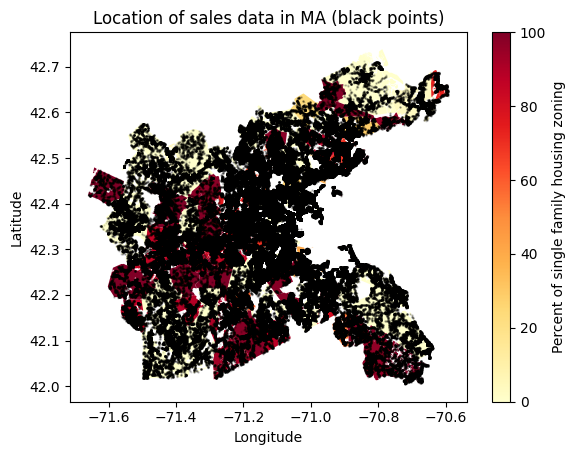

In [4]:

# Load the dataset
df1 = pd.read_csv(file1loc)
df2 = pd.read_csv(file2loc)

# Drop rows with missing coordinates
df1 = df1.dropna(subset=['lat', 'lon'])
df2 = df2.dropna(subset=['lat', 'lon'])

# Create a GeoDataFrame using points_from_xy
gdf1 = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1['lon'], df1['lat']))
gdf2 = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2['lon'], df2['lat']))
gdf4 = gpd.read_file(file4loc)

# Set the coordinate reference system (WGS84)
gdf1.set_crs(epsg=4326, inplace=True)
gdf2.set_crs(epsg=4326, inplace=True)
gdf4 = gdf4.to_crs("EPSG:4326")

column = "%_single_family"
# Plot the data
fig, ax = plt.subplots()
gdf4.plot(column=column,ax=ax, markersize=5, alpha=1.0, legend=True, cmap="YlOrRd",legend_kwds={"label": "Percent of single family housing zoning", "orientation": "vertical"}, missing_kwds={'color': 'lightgrey'})
gdf2.plot(ax=ax, markersize=0.5, alpha=0.1, legend=True, color = 'black', edgecolor="black")
gdf1.plot(ax=ax, markersize=0.5, alpha=0.1, legend=True, color = 'black', edgecolor="black")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Location of sales data in MA (black points)")

#plt.savefig("zoning_map.svg", dpi=300)
plt.show()

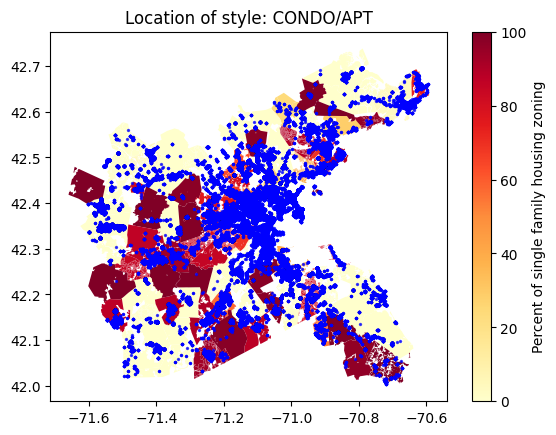

In [5]:
# SELECT HOUSING STYLES TO PLOT!
#styles_to_plot = ["COLONIAL", "RANCH", "CONDO/APT"]
styles_to_plot = ["CONDO/APT"]

# --- Step 1: Load and filter your CSV data
df = pd.read_csv(file2loc)
df = df.dropna(subset=["lat", "lon", "style"])

# (Optional) Filter only certain styles, or based on style frequency
df = df[df["style"].isin(styles_to_plot)]

# --- Step 2: Convert DataFrame to GeoDataFrame
points_gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df["lon"], df["lat"]),
    crs="EPSG:4326" 
)

ax = gdf4.plot(column=column, markersize=5, alpha=1.0, legend=True, cmap="YlOrRd",legend_kwds={"label": "Percent of single family housing zoning", "orientation": "vertical"}, missing_kwds={'color': 'lightgrey'})
points_gdf.plot(ax=ax, marker="o", color="blue", markersize=2, alpha=0.7)

plt.title("Location of style: CONDO/APT")
plt.show()


In [6]:
df = pd.read_csv(file2loc)
df["style"].unique()

array(['GARRISON', 'CONTEMPORARY', 'CONDO/APT', 'COLONIAL',
       'CONVENTIONAL', 'CAPE COD', 'GAMBREL', 'OLD STYLE', 'RANCH',
       'TWO FAMILY', 'LOW-RISE', 'MID-RISE', 'TWO STORY', nan,
       'HIGH-RISE', 'DECKER', 'MLTI-UNT BLG', 'SPLIT LEVEL',
       'RAISED RANCH', 'SPLIT ENTRY', 'TOWNHOUSE', 'DUPLEX',
       'FAMILY FLAT', 'ROW-END', 'MANSION', 'BNGL/COTTAGE', 'MIXED BLDGS',
       'ROW-MIDDLE', 'RAISED CAPE', 'SEMI DETACHD', 'VICTORIAN',
       'ANTIQUE', 'FREE-STANDNG', 'LODGE', 'REVIVAL', 'TOWNHSE-END',
       'ROW HOUSE', 'COTTAGE', 'ONE STORY', 'TUDOR', 'CUSTOMDESIGN',
       'FEDERALIST', 'CAMP/CABIN', 'LOFT', 'BI-LEVEL', 'THREE STORY',
       'STUDIO', 'STACK', 'DUTCH COLONL', 'CARRIAGE HSE', 'SALT BOX',
       'MOBILE HOME', 'LOG', 'QUONSET', 'POST & BEAM', 'A-FRAME',
       'MODULAR', 'CAPE UNFIN'], dtype=object)

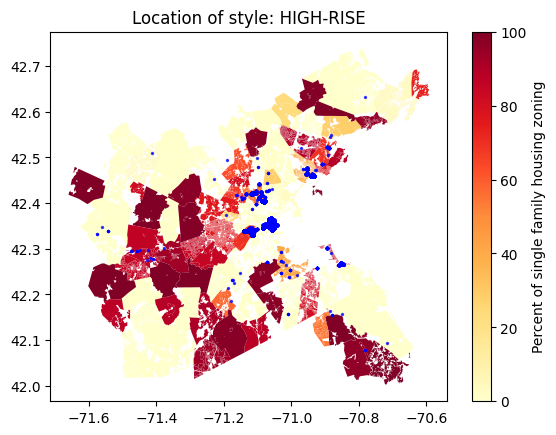

In [7]:
# SELECT HOUSING STYLES TO PLOT!
#styles_to_plot = ["COLONIAL", "RANCH", "CONDO/APT"]
styles_to_plot = ["HIGH-RISE"]

# --- Step 1: Load and filter your CSV data
df = pd.read_csv(file2loc)
df = df.dropna(subset=["lat", "lon", "style"])

# (Optional) Filter only certain styles, or based on style frequency
df = df[df["style"].isin(styles_to_plot)]

# --- Step 2: Convert DataFrame to GeoDataFrame
points_gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df["lon"], df["lat"]),
    crs="EPSG:4326" 
)

ax = gdf4.plot(column=column, markersize=5, alpha=1.0, legend=True, cmap="YlOrRd",legend_kwds={"label": "Percent of single family housing zoning", "orientation": "vertical"}, missing_kwds={'color': 'lightgrey'})
points_gdf.plot(ax=ax, marker="o", color="blue", markersize=2, alpha=0.7)

plt.title("Location of style: HIGH-RISE")
plt.show()


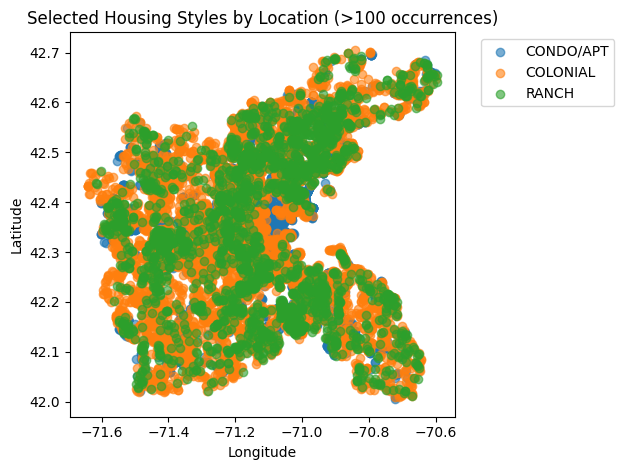

In [31]:
# --- PARAMETER: define only the styles you want to see.
# If you leave this list empty, it will just use all styles with >100 entries.
styles_to_plot = ["COLONIAL", "RANCH", "CONDO/APT"]  

df = pd.read_csv(file2loc)

# Drop rows without latitude, longitude, or style
plot_df = df.dropna(subset=["lat", "lon", "style"])

# Count how many times each style appears
style_counts = plot_df["style"].value_counts()

# Filter to include only those that appear >100 times
common_styles = style_counts[style_counts > 100].index

# If styles_to_plot is non-empty, keep only those styles that are both in your
# user-defined subset AND appear more than 100 times.
# If styles_to_plot is empty, this just uses the common_styles list.
if len(styles_to_plot) > 0:
    final_styles = set(styles_to_plot).intersection(common_styles)
else:
    final_styles = common_styles

# Subset the data
filtered_df = plot_df[plot_df["style"].isin(final_styles)]

# Unique style categories we'll plot
unique_filtered_styles = filtered_df["style"].unique()


for style_val in unique_filtered_styles:
    subset = filtered_df[filtered_df["style"] == style_val]
    plt.scatter(subset["lon"], subset["lat"],label=style_val, alpha=0.6)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Selected Housing Styles by Location (>100 occurrences)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
